<a href="https://colab.research.google.com/github/nickstone1911/data-analysis-practice/blob/main/Logistic_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ABA: Lesson 05 Practice Exercises

In this lesson we practice the concepts introduced in: `Python Lesson 25: Intro to Logistic Regression`
1. Introduce the basics of the `LogisticRegression` classifier in `scikit-learn`, a popular machine learning classifier
2. Examine features and capabilities of `LogisticRegression`
3. Learn how to install and import the `LogisticRegression` classifier
4. Fit a logistic regression model to data
5. Interpret the coefficients produced by the logistic regression model to determine features that are most influential
---

Resources:
>- [Logistic Regression Slides](https://docs.google.com/presentation/d/1zSurhiNUg4z7fgqpXnVEQ89GTufod92wod9HYNMt3qE/edit#slide=id.g26618ceed22_0_86)
>- https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/
>- https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

---

# Section 0


## 0.1 Notebook Setup
>- First, we need to authenticate in Colab in order to use Google Cloud services in our notebook
>- If you are going to be working with files in your Google Drive folder(s) you will need to mount your Google drive as well
>- Then we import standard data science libraries
>>- pandas, numpy, seaborn, matplotlib

Authenticate

In [ ]:
from google.colab import auth
auth.authenticate_user()

Mount Your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Change your working directory (if needed)

In [ ]:
import os
os.chdir('/content/drive/MyDrive/BAIM4205')
os.getcwd()

'/content/drive/MyDrive/BAIM4205'

Load Common Data Science Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## 0.2: Load Data
For this exercise we are going to use the [heart.csv](https://drive.google.com/file/d/1dy9c7CvwpDOUWcstzKDOx-vU7NjkAPwY/view?usp=sharing) file.

>- Download/move the file to your working directory (either MyDrive or your local directory)
>- Load the file into a pandas dataframe named, `heart`

`Canvas Question`: How many rows and columns are in the `heart.csv` dataset?





In [ ]:
hdf = pd.read_csv('heart.csv')
hdf.shape

(303, 14)

In [ ]:
hdf.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1      

## Case Study Data Descriptions

## Business Understanding

Healthcare analytics is a booming area in the data analytics/science field and offers many opportunities for aspiring data scientists/analysts. In this case study we will explore a heart disease dataset that offers a common use of data mining in the healthcare industry.

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

## Data Understanding

Attribute Information:

* `age` - in years
* `sex` - (1=male,0=female)
* `cp` - chest pain type (4 values)
* `trestbps` - resting blood pressure
* `chol` - serum cholestoral in mg/dl
* `fbs` - fasting blood sugar > 120 mg/dl
* `restecg` - resting electrocardiographic results (values 0,1,2)
* `thalach` - maximum heart rate achieved
* `exang` - exercise induced angina
* `oldpeak` - ST depression induced by exercise relative to rest
* `slope` - the slope of the peak exercise ST segment
* `ca` - number of major vessels (0-3) colored by flourosopy
* `thal` - 3 = normal; 6 = fixed defect; 7 = reversable defect
* `num` (target) - 0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

---
---



# Section 1: Exploratory Data Analysis and Visualization

In this section, the problems take you through a series of descriptive/exploratory tasks.

## 1.1: How much of the data is missing?

In the next code cell, write the code to show how many data values exist in each column of our dataset.

In [ ]:
hdf.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 1.2: What are the descriptive analytics for each column in the `heart` DataFrame?

>- Show the feature names as the rows and the descriptive analytics given by `describe()` as the columns. The table below shows a few records and stats to show you how your results should look.
>- Round calculations to two decimals
>- Enter all but whole numbers (e.g., counts, min, max) using two decimals even with trailing zeros, enter 10.10 not 10.1)

### Sample Output
| feature 	| count 	| mean  	| ... 	|
|---------	|-------	|-------	|-----	|
| age     	| 303   	| 54.37 	| ... 	|
| sex     	|       	|       	| ... 	|
| cp      	|       	|       	| ... 	|


In [ ]:
hdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## 1.3: Target Class Distribution

Show how many values each class of the target has in the next cell.

In [ ]:
hdf['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## 1.4: Show a bar plot of the target feature's values per class.


<Axes: xlabel='target', ylabel='count'>

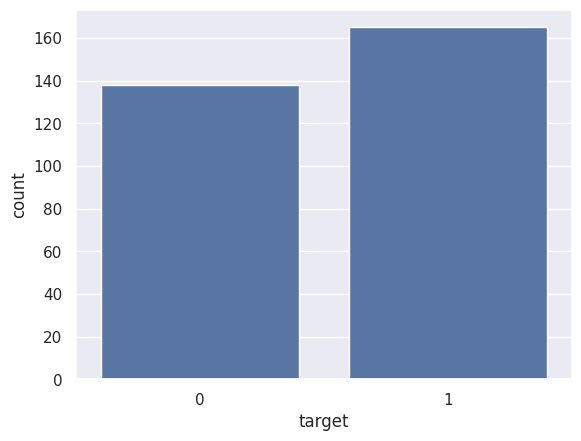

In [ ]:
sns.set(style = 'darkgrid')

sns.countplot(x = 'target', data = hdf)

## 1.5: Create a heatmap that shows the correlation between all the columns of the `heart` DataFrame

>- Hint: Recall the `sns.heatmap()` function
>- Round the correlations to two decimals
>- When entering data to check solutions, use the format, `0.XX` to enter your data (e.g., 0.23, -0.44, etc)

<Axes: >

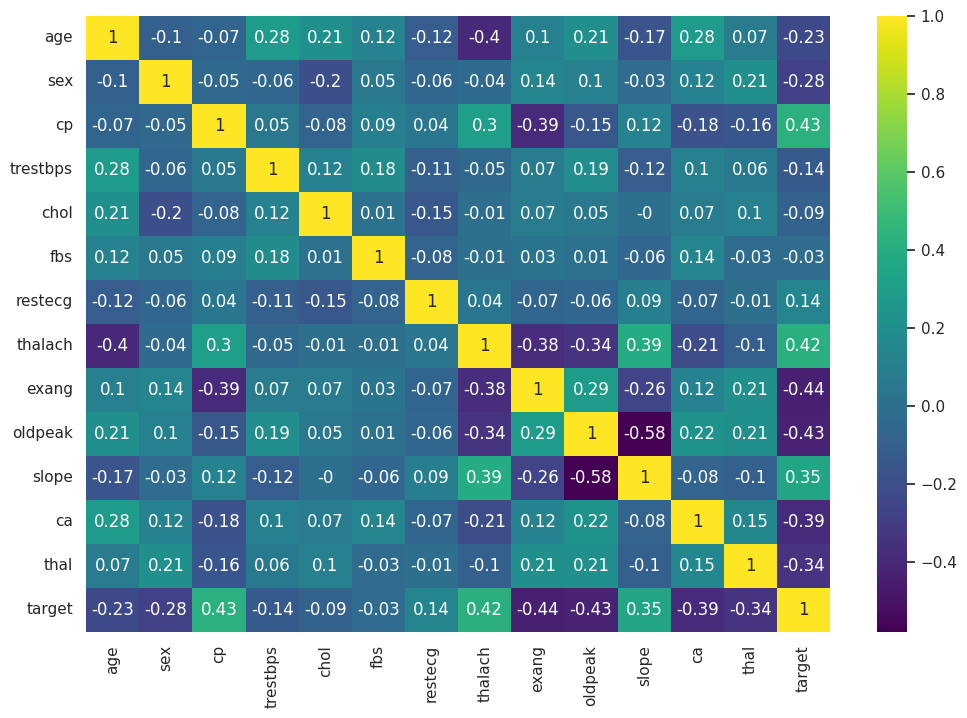

In [ ]:
plt.figure(figsize = (12,8))

sns.heatmap(round(hdf.corr(), 2), cmap = 'viridis', annot=True)

## 1.6: What feature(s) have the strongest correlation with the target variable?

>- Show the correlations in ascending order
>- Round to two decimals
>- When entering data to check solutions, use the format, `0.XX` to enter your data (e.g., 0.23, -0.44, etc)

In [ ]:
round(hdf.corr()['target'].sort_values(ascending = True), 2)

exang      -0.44
oldpeak    -0.43
ca         -0.39
thal       -0.34
sex        -0.28
age        -0.23
trestbps   -0.14
chol       -0.09
fbs        -0.03
restecg     0.14
slope       0.35
thalach     0.42
cp          0.43
target      1.00
Name: target, dtype: float64

# Section 2: Building a `LogisticRegression` Model

In this section the problems step you through creating a logistic regression model.
>- Note 1: at this point in the class we are going to build our model on the full dataset. Later in the course we learn about cross validation and training and test datasets.


## 2.1: Create feature and target variables
In the next code cell:
>- Define `X` as your features
>- Define `y` as your target
>- Show the first 5 records of your features


In [ ]:
log_model = LogisticRegression

x = hdf.drop('target', axis=1)
y = hdf['target']

x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## 2.2: Standardize The Feature Set

In many data mining projects, we will need to standardize/normalize the feature set. This ensures that features with vastly different scales are treated the same numerically by our models and provides a more accurate way to compare feature importance metrics.

`scikit-learn` makes the process of standardizing our features easy. We just need to import `StandardScaler` from `sklean.preprocessing`

See [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for more info and some examples.

---

In the next cell:
1. Create a `StandardScaler()` object with the name, `scaler`
2. Call `fit_transform(X)` on the scaler object and store the results in a variable named, `scaled_X`

Note: We will revisit data transformations throughout the course.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaled_X = scaler.fit_transform(hdf)

scaled_X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -0.71442887,
        -2.14887271,  0.91452919],
       [-1.91531289,  0.68100522,  1.00257707, ..., -0.71442887,
        -0.51292188,  0.91452919],
       [-1.47415758, -1.46841752,  0.03203122, ..., -0.71442887,
        -0.51292188,  0.91452919],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ...,  1.24459328,
         1.12302895, -1.09345881],
       [ 0.29046364,  0.68100522, -0.93851463, ...,  0.26508221,
         1.12302895, -1.09345881],
       [ 0.29046364, -1.46841752,  0.03203122, ...,  0.26508221,
        -0.51292188, -1.09345881]])

## 2.3: Fit the model

In the next cell, fit a logistic regression model using the `scaled_X` and `y` data.

In [ ]:
log_model = LogisticRegression()

log_model.fit(scaled_X,y)

LogisticRegression()

# 2.4: Coefficients

In the next cell:

>- Store the model coefficients and odds ratios in a DataFrame named `importance_df`
>- Sort the dataframe by odds ratio in descending order
>- Round both the coefficients and odds ratios to 2 decimals
>- Include preceeding zeros for float values if they exist (e.g., enter 0.25 and not .25)
>-  Recall: we get model coefficients by calling `coef_[0]` on our model and odds ratios are calculated by exponentiating the logistic regression coefficients



In [ ]:
feature_names = list(x.columns)

model_coef = list(log_model.coef_[0])

odds_ratios = list(np.exp(model_coef))

coef_odds = list(zip(model_coef, odds_ratios))

feature_coef = dict(zip(feature_names, coef_odds))

feature_coef



{'age': (-0.06846905926907892, 0.933822352802686),
 'sex': (-0.3195968391249644, 0.7264418509764723),
 'cp': (0.35355576261814986, 1.4241223975307287),
 'trestbps': (-0.1153573077829897, 0.8910477087391897),
 'chol': (-0.09509750187880549, 0.9092842732209753),
 'fbs': (0.0013814745624583485, 1.0013824292380111),
 'restecg': (0.11242910525979084, 1.1189929233880496),
 'thalach': (0.216067393026291, 1.2411860234644247),
 'exang': (-0.2287953264454456, 0.7954913328828803),
 'oldpeak': (-0.26980253988500813, 0.7635302462228399),
 'slope': (0.15047643362351312, 1.1623879115092064),
 'ca': (-0.3135345247838255, 0.7308591458140054),
 'thal': (-0.22003213710960814, 0.8024930077423196)}

In [ ]:
importance_df = pd.DataFrame.from_dict(feature_coef,
                                       orient = 'index',
                                       columns = ['Coeff', 'Odds_ratio']).sort_values(by = 'Odds_ratio', ascending = False)
importance_df

,Coeff,Odds_ratio
cp,0.353556,1.424122
thalach,0.216067,1.241186
slope,0.150476,1.162388
restecg,0.112429,1.118993
fbs,0.001381,1.001382
age,-0.068469,0.933822
chol,-0.095098,0.909284
trestbps,-0.115357,0.891048
thal,-0.220032,0.802493
exang,-0.228795,0.795491


## 2.5: Plot the features by `Odds_Ratio`

In the next cell, plot the odds ratios.

>- Sort the `importance_df` DataFrame by `Odds_Ratio` in descending order

In [ ]:
importance_df.sort_values(by = 'Coeff', ascending = False)

,Coeff,Odds_ratio
cp,0.353556,1.424122
thalach,0.216067,1.241186
slope,0.150476,1.162388
restecg,0.112429,1.118993
fbs,0.001381,1.001382
age,-0.068469,0.933822
chol,-0.095098,0.909284
trestbps,-0.115357,0.891048
thal,-0.220032,0.802493
exang,-0.228795,0.795491


# Section 3: Interpretation

In this section we interpret our results. Remember, we are not building these models for prediction yet but we can use our logistic regression analysis to understand/explain our data in more depth. Later in the course we learn methods for developing models for prediction.



## 3.1: What 2 features appear to increase the odds of heart disease the most?

List the top 2 features in order of increasing the odds the most to least below:

---
1.

2.

---

## 3.2: What 2 features appear to decrease the odds of heart disease the most?

List the top 2 features in order of decreasing the odds the most:

---
1.

2.

---

## 3.3: Digging Deeper Into Our findings

Some might find it a bit suprising that males had lower odds of having heart disease than females according to this dataset. Let's examine a cross tabulation using sex as our feature to help understand how our logistic regression model helpd us come to this conclusion.

In the next cell, create a `crosstab` showing the target (disease or not) as the rows and sex as the columns.

## 3.4: Calculate Odds Ratios for Females

In the next cell, calculate the odds ratio for females by using the equation for odds ratios (i.e., do not use the odds ratios from fitting a logistic regression model). See the last few slides of the [Logistic Regression Notes](https://docs.google.com/presentation/d/1zSurhiNUg4z7fgqpXnVEQ89GTufod92wod9HYNMt3qE/edit#slide=id.g2b3b81afb94_0_5) if you need a reminder of how to do this.

>- Round the odds ratio to two decimal places